In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.preprocessing import scale

class Kmeans:
  def __init__(self, k ,iterations=300):
    self.k = k
    self.iterations = iterations


  def fit(self, X):
    self.X = X
    self.centroids={}

    for i in range(self.k):
      self.centroids[i] = X[i]


    for epoch in range(self.iterations):
      rows = X.shape[0]
      clusterDest = np.zeros(rows)
      clust={}
      for i in range(self.k):
        clust[i] = []

      j = 0
      for i in X:
        distances = [np.linalg.norm(i-self.centroids[centroid]) for centroid in range(self.k)]
        clust[distances.index(min(distances))].append(i)
        clusterDest[j] = distances.index(min(distances))
        j += 1

      for i in range(self.k):
        self.centroids[i] = np.average(clust[i],axis=0)

    return (self.centroids, clusterDest)


def takePlot(centroids, clusterDest, data, k):
  for j, kernel in enumerate(centroids):
    x = []
    y = []
    for i, line in enumerate(data):
      if (clusterDest[i] == j):
        x.append(line[0])
        y.append(line[1])
    plt.scatter(x, y)
  for i in range(k):
    plt.scatter(centroids[i][0], centroids[i][1], marker = 'x', c = 'black')
  plt.show()


Big distance between groups


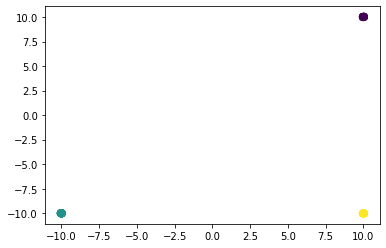

In [9]:
print("Big distance between groups")
samples = 1000
density = 0.025
centers = [[10, 10], [-10, -10], [10, -10]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

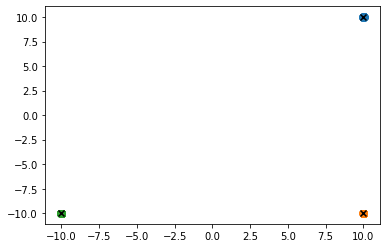

Completeness: 1.000
Homogeneity: 1.000
Adjusted Rand index: 1.000
Adjusted Mutual information: 1.000


In [10]:
k=3
model = Kmeans(k)
centroids, clusterDest = model.fit(data)
takePlot(centroids, clusterDest, data, k)

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, clusterDest))

Very small distance between groups


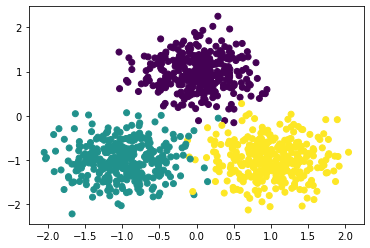

In [11]:
print("Very small distance between groups")
samples = 1000
density = 0.4
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)
plt.scatter(data[:,0],data[:,1], c=labels_true)

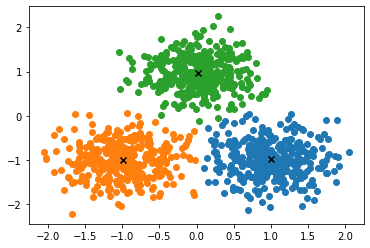

Completeness: 0.941
Homogeneity: 0.941
Adjusted Rand index: 0.967
Adjusted Mutual information: 0.941


In [12]:
k=3
model = Kmeans(k)
centroids, clusterDest = model.fit(data)
takePlot(centroids, clusterDest, data, k)

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, clusterDest))

Average intersection area of classes is 10-20%


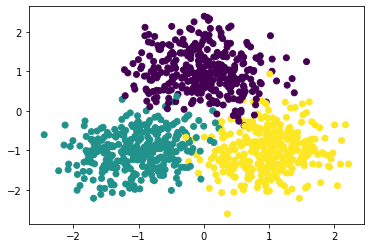

In [13]:
print("Average intersection area of classes is 10-20%")
samples = 1000
density = 0.5
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

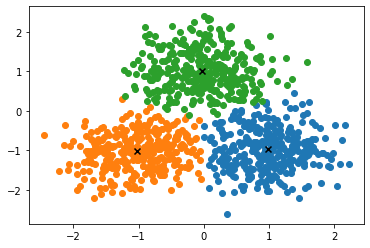

Completeness: 0.848
Homogeneity: 0.848
Adjusted Rand index: 0.901
Adjusted Mutual information: 0.848


In [14]:
k=3
model = Kmeans(k)
centroids, clusterDest = model.fit(data)
takePlot(centroids, clusterDest, data, k)

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, clusterDest))

Average intersection area of classes is 50-70%


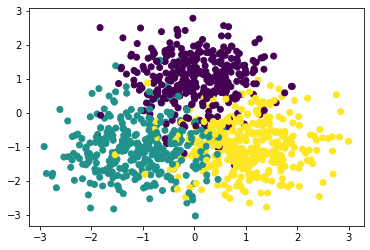

In [15]:
print("Average intersection area of classes is 50-70%")
samples = 1000
density = 0.7
centers = [[0, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
data, labels_true = make_blobs(n_samples=samples, centers=centers, cluster_std=density)

plt.scatter(data[:,0],data[:,1], c=labels_true)

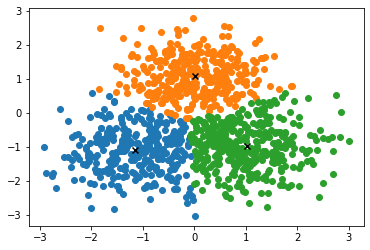

Completeness: 0.590
Homogeneity: 0.590
Adjusted Rand index: 0.668
Adjusted Mutual information: 0.589


In [16]:
k=3
model = Kmeans(k)
centroids, clusterDest = model.fit(data)
takePlot(centroids, clusterDest, data, k)

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(labels_true, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, clusterDest))

In [18]:
print("Dataset Breast cancer Wisconsin")
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X = scale(X)

k = 2 #количество кластеров
model=Kmeans(k)
centroids, clusterDest = model.fit(X)

print("Completeness: %0.3f" % metrics.completeness_score(y, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(y, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(y, clusterDest))

Dataset Breast cancer Wisconsin
Completeness: 0.573
Homogeneity: 0.551
Adjusted Rand index: 0.677
Adjusted Mutual information: 0.561


In [20]:
print("Dataset Wine")
dataset = load_wine()
X = dataset.data
y = dataset.target
X = scale(X)

k = 3 #количество кластеров
model=Kmeans(k)
centroids, clusterDest = model.fit(X)

print("Completeness: %0.3f" % metrics.completeness_score(y, clusterDest))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusterDest))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(y, clusterDest))
print("Adjusted Mutual information: %0.3f" % metrics.adjusted_mutual_info_score(y, clusterDest))

Dataset Wine
Completeness: 0.844
Homogeneity: 0.850
Adjusted Rand index: 0.864
Adjusted Mutual information: 0.846
